In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import date
from sklearn import preprocessing
import xgboost as xgb
import pickle

#### load data

In [2]:
# Load Train Data
submission = pd.read_pickle('../data/processed/submission_x_envios_feateng.pkl')

In [3]:
submission.shape

(12897, 95)

In [4]:
# encoder
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../models/canal_le.npy', allow_pickle=True)

In [5]:
submission['canal'] = np.where(submission['canal'].isnull(), 'NAN', submission['canal'])

In [6]:
submission['canal'] = le.transform(submission['canal'].values)

In [7]:
predictors = [
    'id_pos', 
    'canal',
    'competidores',
    'ingreso_mediana',
    'ingreso_promedio',
    'densidad_poblacional',
    'pct_0a5',
    'pct_5a9',
    'pct_10a14',
    'pct_15a19',
    'pct_20a24',
    'pct_25a29',
    'pct_30a34',
    'pct_35a39',
    'pct_40a44',
    'pct_45a49',
    'pct_50a54',
    'pct_55a59',
    'pct_60a64',
    'pct_65a69',
    'pct_70a74',
    'pct_75a79',
    'pct_80a84',
    'pct_85ainf',
    'pct_bachelors',
    'pct_doctorados',
    'pct_secundario',
    'pct_master',
    'pct_bicicleta',
    'pct_omnibus',
    'pct_subtes',
    'pct_taxi',
    'pct_caminata',
    'mediana_valor_hogar',
    'unidades_despachadas_sum', 
    'unidades_despachadas_max',
    'unidades_despachadas_min', 
    'unidades_despachadas_avg',
    'cantidad_envios_max', 
    'cantidad_envios_min', 
    'cantidad_envios_avg',
    'num_cantidad_envios', 
    'unidades_despachadas_sum_acum', 
    'unidades_despachadas_sum_acum_3p',
    'unidades_despachadas_sum_acum_6p', 
    'unidades_despachadas_max_acum', 
    'unidades_despachadas_min_acum', 
    'num_cantidad_envios_acum', 
    'num_cantidad_envios_acum_3per',
    'num_cantidad_envios_acum_6per', 
    'diff_dtventa_dtenvio',
    'unidades_before', 
    'num_ventas_before',
    'rel_unidades_num_ventas', 
    'unidades_acum', 
    'num_ventas_acum',
    'countacum', 'unidades_mean', 
    'num_ventas_mean',
    'unidades_2time_before', 
    'unidades_diff', 
    'month',
    'diff_dtventa_dtventa_before', 
    'unidades_pend',
]

In [8]:
# Select final var of the model
submission = submission[predictors]

#### load model

In [9]:
# Load model
model = pickle.load(open("../models/xgboost_006.pkl", "rb"))

In [10]:
model.get_booster

<bound method XGBModel.get_booster of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=7, min_child_weight=4, missing=nan,
       n_estimators=651, n_jobs=1, nthread=None,
       objective='reg:squarederror', random_state=0, reg_alpha=0.01,
       reg_lambda=1, scale_pos_weight=1, seed=3, silent=None,
       subsample=0.9, tree_method='gpu_hist', verbosity=1)>

In [11]:
y_pred = model.predict(submission)

In [12]:
np.median(y_pred)

16.492579

In [13]:
y_pred_fixed = np.where(y_pred < 0, 0, y_pred)

In [14]:
np.median(y_pred_fixed)

16.492579

In [15]:
submission['unidades_pred'] = np.round(y_pred_fixed)

In [16]:
submission['unidades_pred'] = submission['unidades_pred'].astype(int)

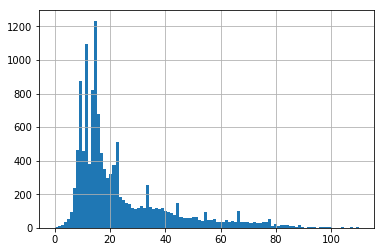

In [18]:
submission['unidades_pred'].hist(bins=100)
pass

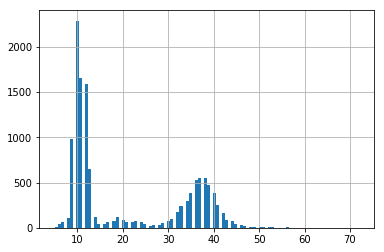

In [18]:
submission['unidades_pred'].hist(bins=100)
pass

In [19]:
submission[['id_pos','unidades_pred']].to_csv('../data/submissions/sub013.csv', sep=',', index=False, header=False)

In [20]:
submission.isnull().any()

id_pos                              False
canal                               False
competidores                         True
ingreso_mediana                      True
ingreso_promedio                     True
densidad_poblacional                 True
pct_0a5                              True
pct_5a9                              True
pct_10a14                            True
pct_15a19                            True
pct_20a24                            True
pct_25a29                            True
pct_30a34                            True
pct_35a39                            True
pct_40a44                            True
pct_45a49                            True
pct_50a54                            True
pct_55a59                            True
pct_60a64                            True
pct_65a69                            True
pct_70a74                            True
pct_75a79                            True
pct_80a84                            True
pct_85ainf                        